In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy
import data_loader, models, train
from matplotlib import pyplot as plt
import numpy as np

import torch

In [3]:
dataloader_train, dataloader_valid = data_loader.CustomDataloaders.MNIST()
device = torch.device('cuda:0')

In [117]:
model = models.AutoEncoderConvNet()
mse_loss = torch.nn.L1Loss()
trainer = train.Train(model=model, epochs=10, train_loader=dataloader_train, loss_fn=mse_loss, device=torch.device('cuda:0'), validate_loader=dataloader_valid, is_autoencoder=True)
trainer.train()


epoch: 0
training loss: 0.00171
validation loss: 0.00159

epoch: 1
training loss: 0.00149
validation loss: 0.00145

epoch: 2
training loss: 0.00135
validation loss: 0.00136

epoch: 3
training loss: 0.00129
validation loss: 0.00131

epoch: 4
training loss: 0.00126
validation loss: 0.00129

epoch: 5
training loss: 0.00123
validation loss: 0.00129

epoch: 6
training loss: 0.00122
validation loss: 0.00125

epoch: 7
training loss: 0.00120
validation loss: 0.00123

epoch: 8
training loss: 0.00119
validation loss: 0.00122

epoch: 9
training loss: 0.00118
validation loss: 0.00120


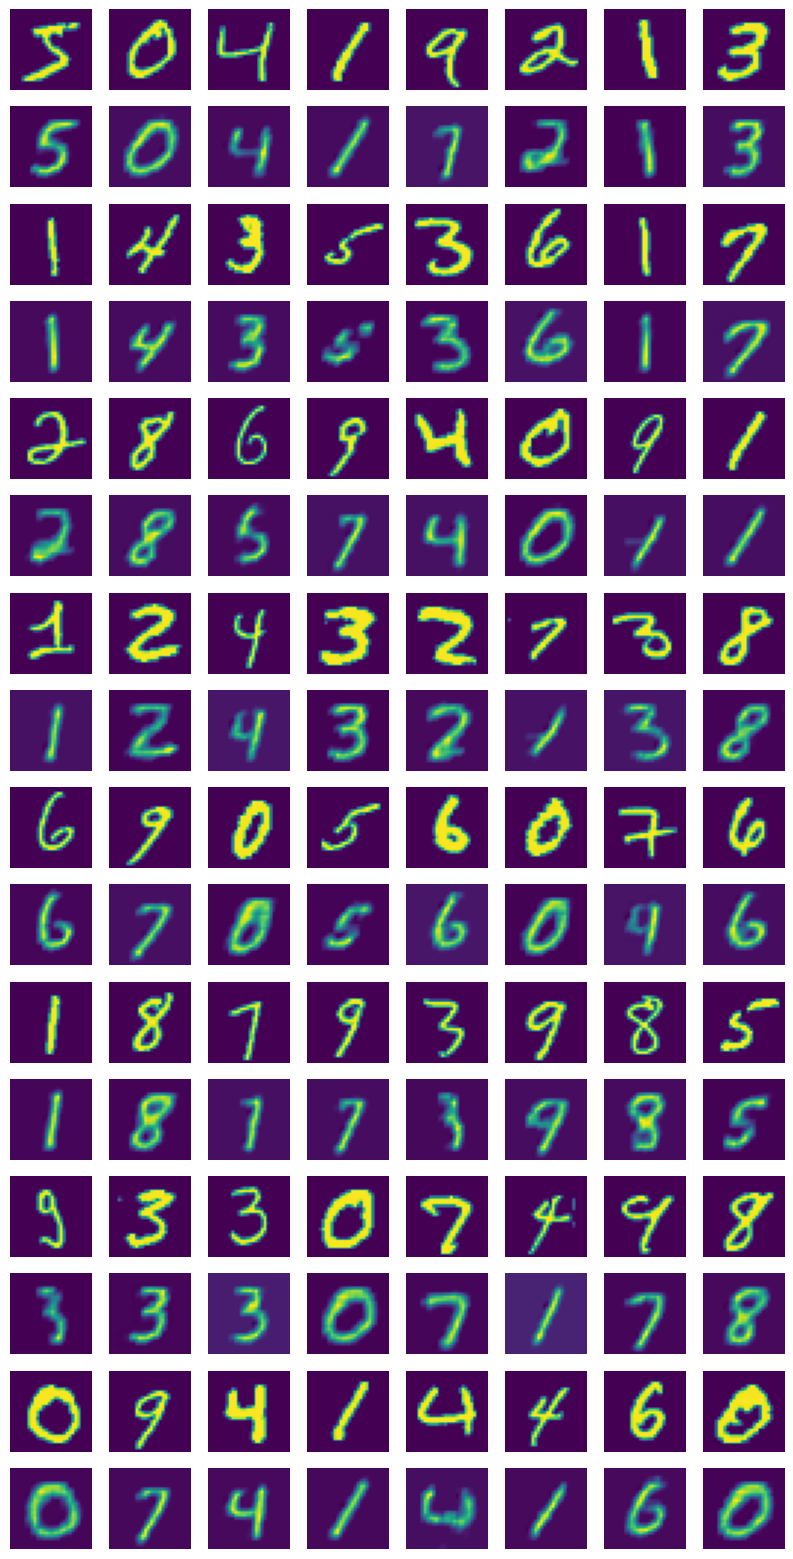

In [118]:
x, _ = next(iter(dataloader_train))
x = x.to(device)
model.eval()
pred = model(x).to('cpu').detach().numpy()
# pred = np.where(pred < 0.5, 0, 1)
x = x.to('cpu')

# Set up the grid size
rows = 8
cols = 8
size = 10

# Create a figure and axis
fig, axs = plt.subplots(2 * rows, cols, figsize=(size, 2*size))

# Loop through each image in the batches and plot them
for i in range(rows):
    for j in range(cols):
        axs[2*i, j].imshow(x[i * cols + j, 0])  # Plot the image from batch x
        axs[2*i, j].axis('off')  # Turn off the axes
        axs[2*i + 1, j].imshow(pred[i * cols + j, 0])  # Plot the image from batch y
        axs[2*i + 1, j].axis('off')  # Turn off the axes

plt.show()


In [237]:
x, _ = next(iter(dataloader_train))
x = x.to(device)

x_encoded = model.encoder(x)
x_encoded = x_encoded.to('cpu').detach().numpy()
x_cov = np.cov(x_encoded.T)
x_eigval, x_eigvec = np.linalg.eig(x_cov)
d0, d1, d2, d3, d4, d5 = x_eigvec[0:6]

In [251]:
lim = 2
n = 8
e1, e2 = d0, d3


base = np.linspace(-lim, lim, n)
x = np.einsum('i,j->ij', base, e1)
y = np.einsum('i,j->ij', base, e2)

xy_grid = np.zeros(shape=(n, n, np.shape(x)[1]))
for i in range(n):
    for j in range(n):
        xy_grid[i,j] = base[i] * e1 + base[j] * e2

xy_grid = xy_grid.reshape((-1,x.shape[1]))
xy_grid = torch.Tensor(xy_grid).to(device)

pred = model.decoder(torch.nn.functional.relu(xy_grid)).to('cpu').detach().numpy()

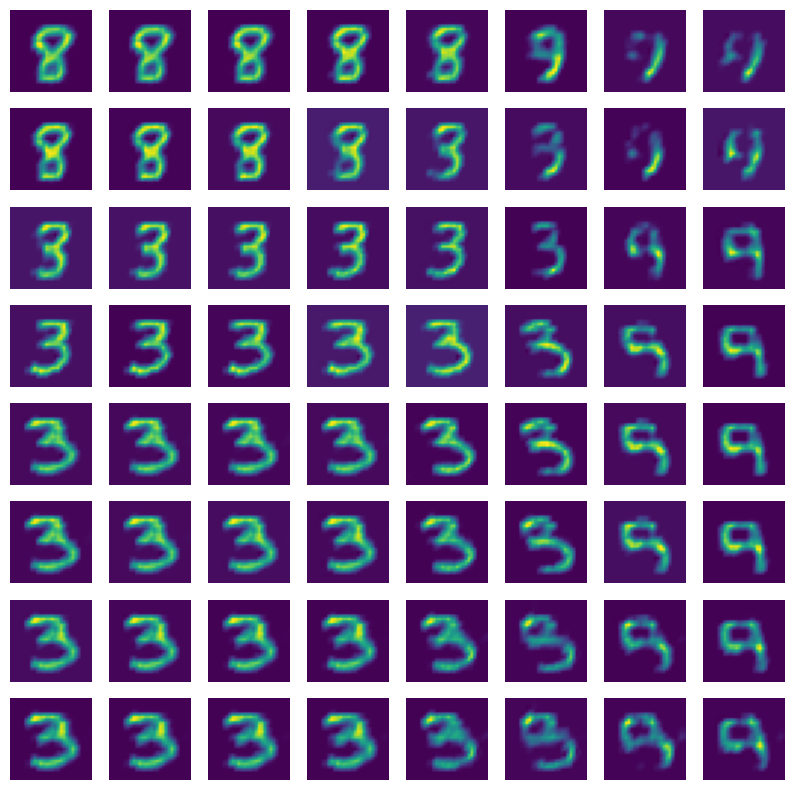

In [252]:
# Set up the grid size
rows = n
cols = n
size = 10

# Create a figure and axis
fig, axs = plt.subplots(rows, cols, figsize=(size, size))

# Loop through each image in the batches and plot them
for i in range(rows):
    for j in range(cols):
        axs[i, j].imshow(pred[i * cols + j, 0])  # Plot the image from batch x
        axs[i, j].axis('off')  # Turn off the axes

plt.show()
